In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import dateutil
from geopy.geocoders import Nominatim
import folium
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
df = pd.read_csv('survey.csv')

In [3]:
df.shape

(1259, 27)

In [4]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [5]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
set(val[0:10] for val in df['Timestamp'])

{'2014-08-27',
 '2014-08-28',
 '2014-08-29',
 '2014-08-30',
 '2014-08-31',
 '2014-09-01',
 '2014-09-02',
 '2014-09-03',
 '2014-09-04',
 '2014-09-05',
 '2014-09-08',
 '2014-09-09',
 '2014-09-11',
 '2014-09-12',
 '2014-09-13',
 '2014-09-14',
 '2014-09-20',
 '2014-09-23',
 '2014-09-26',
 '2014-09-30',
 '2014-10-02',
 '2014-10-05',
 '2014-10-09',
 '2014-11-05',
 '2014-11-06',
 '2014-11-16',
 '2014-12-01',
 '2014-12-15',
 '2015-01-03',
 '2015-02-21',
 '2015-02-22',
 '2015-02-24',
 '2015-02-26',
 '2015-04-02',
 '2015-04-04',
 '2015-04-06',
 '2015-04-11',
 '2015-04-23',
 '2015-05-05',
 '2015-05-06',
 '2015-05-07',
 '2015-06-25',
 '2015-07-22',
 '2015-07-27',
 '2015-08-17',
 '2015-08-20',
 '2015-08-25',
 '2015-09-12',
 '2015-09-26',
 '2015-11-07',
 '2015-11-30',
 '2016-02-01'}

In [7]:
df['Timestamp'] = df['Timestamp'].apply(dateutil.parser.parse)

In [8]:
df.dtypes

Timestamp                    datetime64[ns]
Age                                   int64
Gender                               object
Country                              object
state                                object
self_employed                        object
family_history                       object
treatment                            object
work_interfere                       object
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview         

In [9]:
all_nan = df.columns[df.isnull().all()]
list(all_nan)

[]

In [10]:
any_nan = df.columns[df.isnull().any()]
list(any_nan)

['state', 'self_employed', 'work_interfere', 'comments']

In [11]:
set(df['self_employed'])

{nan, 'Yes', 'No'}

In [12]:
set(df['work_interfere'])

{nan, 'Never', 'Rarely', 'Often', 'Sometimes'}

In [13]:
miss = df[(df['work_interfere'].isnull()) 
          | (df['self_employed'].isnull())]

In [14]:
miss.shape

(282, 27)

In [15]:
overlap = miss[(miss['work_interfere'].isnull()) 
          & (miss['self_employed'].isnull())]
overlap.shape

(0, 27)

In [16]:
miss_set = miss[['work_interfere','self_employed']].drop_duplicates()
miss_set

,work_interfere,self_employed
0,Often,NaN
1,Rarely,NaN
4,Never,NaN
5,Sometimes,NaN
19,NaN,Yes
26,NaN,No


In [17]:
df['Age'].describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [18]:
err_ages = df.query('Age<0 or Age>150')
err_ages.shape

(5, 27)

In [19]:
df = df.query('Age>=0 and Age<150')
df.shape

(1254, 27)

In [20]:
df['Age'].describe()

count    1254.000000
mean       32.019139
std         7.375005
min         5.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

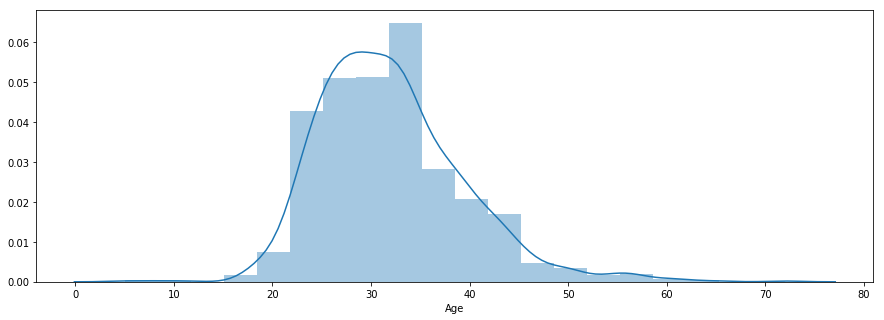

In [37]:
plt.subplots(figsize=(15,5))
sns.distplot(df['Age'],bins=20)
plt.show()

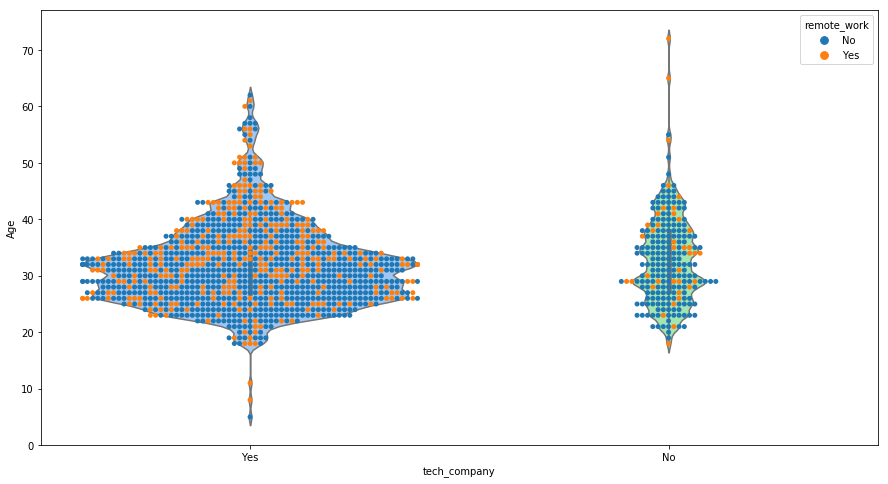

In [22]:
plt.subplots(figsize=(15,8))
sns.violinplot(x="tech_company", y="Age", data=df,
               bw=.1, scale="count", palette='pastel');
sns.swarmplot(x="tech_company", y="Age", hue="remote_work", data=df, alpha=1);
plt.show()

In [23]:
country_agg = (df.groupby('Country')[['Age']].count())
country_agg['Country'] = country_agg.index
country_agg.rename(columns={'Age':'count'},inplace=True)
country_agg.describe()

,count
count,47.000000
mean,26.680851
std,111.294577
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,748.000000


In [24]:
#please wait a minute and re-run this step if it fails. 
#geopy sometimes thros an error for what seems to be too many requests.
geolocator = Nominatim()

country_top10 = country_agg.nlargest(10,'count')
countries  = pd.DataFrame({'Country':list(country_top10['Country'])})

names = []
lats = []
longs = []

print('Fetching countries, please wait...')
for c in list(countries['Country']):
   geo = geolocator.geocode(c) 
   names.append(c)
   lats.append(geo.latitude)
   longs.append(geo.longitude)
   print('...')
print('Done!')

geo_df = pd.DataFrame({'Country':names,'longitude':longs,'latitude':lats})
df_coords = pd.merge(country_agg,geo_df,how='inner',on='Country')

map = folium.Map(location=[20,0], tiles='Mapbox Bright', zoom_start=1.5)
for i in range(0,10):
    row = df_coords.iloc[i]
    folium.Circle(
        location=[row['latitude'],row['longitude']],
        popup=row['Country'],
        radius=str(row['count']*1000),
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(map)
map

Fetching countries, please wait...
...
...
...
...
...
...
...
...
...
...
Done!


In [25]:
set(df['family_history'])

{'No', 'Yes'}

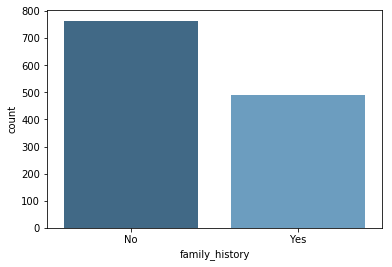

In [26]:
sns.countplot(x='family_history', data=df, palette="Blues_d")
plt.show()

In [27]:
print(set(df['mental_vs_physical']))
print(set(df['benefits']))
print(set(df['no_employees']))

{'Yes', 'No', "Don't know"}
{'Yes', 'No', "Don't know"}
{'1-5', '26-100', '6-25', '500-1000', 'More than 1000', '100-500'}


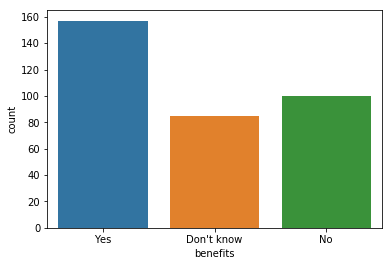

In [28]:
sns.countplot(x='benefits', data=df[df['mental_vs_physical']=='Yes'])
plt.show()

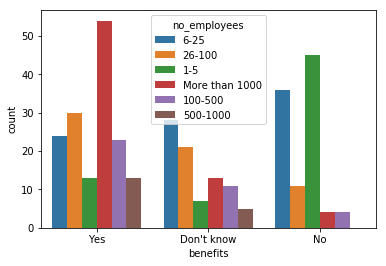

In [29]:
sns.countplot(x='benefits', data=df[df['mental_vs_physical']=='Yes'],hue='no_employees')
plt.show()

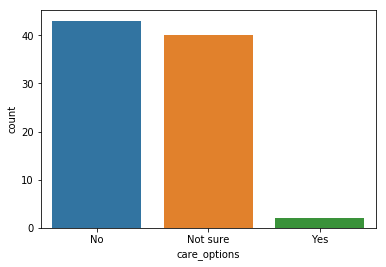

In [30]:
sns.countplot(x='care_options', data=df[
    (df['mental_vs_physical']=='Yes') & 
    (df['benefits'] == "Don't know")] )
plt.show()

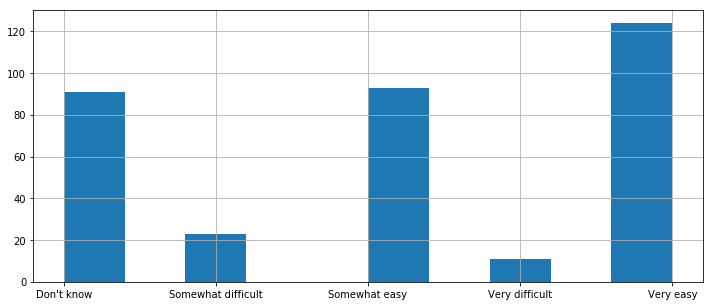

In [31]:
(df[df['mental_vs_physical'] == "Yes"])['leave'].hist(figsize=(12,5))
plt.show()

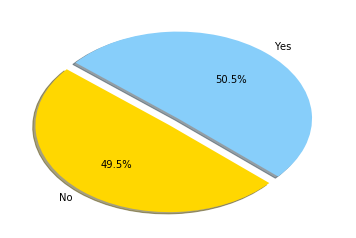

In [32]:
treat_agg = (df.groupby('treatment')[['Age']].count())
treat_agg['treatment'] = treat_agg.index
treat_agg.rename(columns={'Age':'count'},inplace=True)

plt.pie(treat_agg['count'],explode=(0.1,0),labels=treat_agg['treatment'],
        colors=['gold','lightskyblue'],autopct='%1.1f%%', shadow=True, startangle=140)

plt.show()

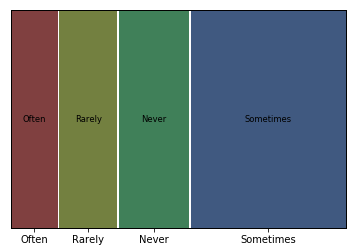

In [33]:
mosaic(df,['work_interfere'])
plt.show()